### Module 3 InClass Assignment 

1. Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.

- Split the data into a training and a test set using train_test_split. 

- Use the LinearRegression class to learn a regression model on this data. 

- You can evaluate with the score method, which provides the R^2or using the mean_squared_error function from sklearn.metrics (Challenge: You can also write it yourself in numpy).


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

In [4]:
df=pd.read_csv('bike_day_raw.csv')
display(df)
print(df.isnull().sum())
print(df.shape)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64
(731, 11)


In [5]:
X=df.drop(columns=['cnt'])
y=df['cnt']

In [6]:
pd.get_dummies(X,drop_first=True)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print(f"Train R^2: {train_score:.2f}")
print(f"Test R^2: {test_score:.2f}")

Train R^2: 0.52
Test R^2: 0.55


In [14]:
# Predict on the test data
y_pred = model.predict(X_test)

# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 1796978.11


2. Load the diabetes dataset using sklearn.datasets.load_diabetes.
- Scale the dataset (you can be creative and make pipelines)
- Apply LinearRegression, 
- Apply Ridge and do grid search 
- Apply Lasso and do grid search
- Visualize the coefficients.


In [19]:
diabetes=load_diabetes()
X,y=diabetes.data,diabetes.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
pipeline_lr=Pipeline([
    ('scaler',StandardScaler()),
    ('lr',LinearRegression())
])

pipeline_lr.fit(X_train,y_train)
lr_score=pipeline_lr.score(X_test,y_test)
print(f"Linear Regression R^2 score: {lr_score:.4f}")

Linear Regression R^2 score: 0.4526


In [22]:
pipeline_ridge=Pipeline([
    ('scaler',StandardScaler()),
    ('ridge',Ridge())
])

ridge_params={'ridge__alpha':[0.1,1,10,100,200]}
ridge_grid=GridSearchCV(pipeline_ridge,ridge_params,cv=5)
ridge_grid.fit(X_train,y_train)

best_ridge=ridge_grid.best_estimator_
ridge_score=best_ridge.score(X_test,y_test)
print(f"Best Ridge Regression R^2 score: {ridge_score:.4f}")
print(f"Best Ridge alpha: {ridge_grid.best_params_}")

Best Ridge Regression R^2 score: 0.4572
Best Ridge alpha: {'ridge__alpha': 10}


In [25]:
pipeline_lasso=Pipeline([
    ('scaler',StandardScaler()),
    ('lasso',Lasso(max_iter=10000))
])

lasso_params={'lasso__alpha':[0.01,0.1,1,10,100]}
lasso_grid=GridSearchCV(pipeline_lasso,lasso_params,cv=5)
lasso_grid.fit(X_train,y_train)

best_lasso=lasso_grid.best_estimator_
lasso_score=best_lasso.score(X_test,y_test)
print(f"Best Lasso Regression R^2 score: {lasso_score:.4f}")
print(f"Best Lasso alpha: {lasso_grid.best_params_}")

Best Lasso Regression R^2 score: 0.4669
Best Lasso alpha: {'lasso__alpha': 1}


In [26]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [27]:
lr_coef=pipeline_lr.named_steps['lr'].coef_
ridge_coef=best_ridge.named_steps['ridge'].coef_
lasso_coef=best_lasso.named_steps['lasso'].coef_

In [28]:
x_ticks=diabetes.feature_names

In [29]:
x_indices=np.arange(len(x_ticks))

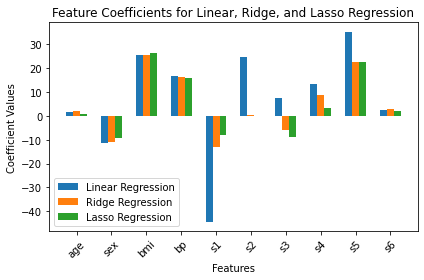

In [30]:
plt.bar(x_indices - 0.2, lr_coef, 0.2, label="Linear Regression")
plt.bar(x_indices, ridge_coef, 0.2, label="Ridge Regression")
plt.bar(x_indices + 0.2, lasso_coef, 0.2, label="Lasso Regression")

plt.xticks(x_indices, x_ticks, rotation=45)
plt.xlabel("Features")
plt.ylabel("Coefficient Values")
plt.title("Feature Coefficients for Linear, Ridge, and Lasso Regression")
plt.legend()
plt.tight_layout()
plt.show()